In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import simps
import math

                        # Gradient Descent
    zeeta = parameter to optimize
    peeta = parameter to optimize
    step_grad = const
    grad = dE/dzeeta
    updated_zeeta = zeeta - (step_grad * grad)
    

                             # Gradient
 The expression of gradient would change, according to the energy expectation expression

         # Implementing the gradient descent opt with the help of initial values

In [2]:
class Variational_method:
    def __init__(self,psi_trial, zeeta_ini,peeta_ini, step, num_iterations,tolerance):
        self.f = psi_trial
        self.zeeta_ini = zeeta_ini
        self.peeta_ini = peeta_ini
        self.step = step
        self.num_iterations = num_iterations
        self.tolerance = tolerance
        self.m_e = 1
        self.h_cut = 1
        self.g = 10
        
    # Derivative of parameter for steepest gradient descent
    def dE_dpara(self,parameter0, parameter1, E0, E1):
        derivative = (E1 - E0)/(parameter1 - parameter0)
        return derivative

    # Returns the derivative of particular wavefunction wrt x on the whole x-grid
    # therefore f_dash returns the (n-1) derivative points for n points on x-grid
    def d_dx(self,x,zeeta, peeta):
        h = x[1] - x[0]
        f_dash = np.zeros(len(x))
        for i in range(len(x)-1):
            f_dash[i] = ( self.f(zeeta,peeta,x[i+1]) - self.f(zeeta,peeta,x[i]) )/h
    
        return f_dash
    
    def d_2_dx(self,x, zeeta,peeta):
        h = x[1] - x[0]
        f_double_dash = np.zeros(len(x))
    
        for i in range(1, len(x)-1):
            f_double_dash[i] = ( self.f(zeeta,peeta,x[i+1]) - 2*self.f(zeeta,peeta,x[i]) + self.f(zeeta,peeta,x[i-1])) / h**2
        
        return f_double_dash
    
    def plots(self, zeeta_list,peeta_list, energy_list, iteration_list):
        plt.subplot(3,1,1)
        plt.plot(zeeta_list, energy_list)
        plt.xlabel("updated_zeetas")
        plt.ylabel("Energy")
        plt.subplot(3,1,2)
        plt.plot(peeta_list, energy_list)
        plt.xlabel("updated_peetas")
        plt.ylabel("Energy")
        plt.subplot(3,1,3)
        plt.xlabel("Iterations")
        plt.ylabel("Energy")
        plt.plot(iteration_list, energy_list)
    
    def bra_H_ket(self,V, x_grid,zeeta,peeta):
        T_ket = (-1/2)*self.d_2_dx(x_grid, zeeta, peeta)
    
        bra_T_ket = simps(np.conj(self.f(zeeta,peeta,x_grid)) * T_ket, x_grid)
        bra_V_ket = simps(np.conj(self.f(zeeta,peeta,x_grid))*V*self.f(zeeta,peeta,x_grid), x_grid)
    
        bra_H_ket = bra_T_ket + bra_V_ket
    
        return bra_H_ket
    
    def bra_ket_overlap(self,x_grid,zeeta,peeta):
        bra_ket_integrate = simps(np.conj(self.f(zeeta,peeta,x_grid))*self.f(zeeta,peeta,x_grid) , x_grid)
    
        return bra_ket_integrate
    
    def expected_energy(self,V, x_grid,zeeta,peeta):
        bra_h_ket = self.bra_H_ket(V, x_grid, zeeta,peeta)
        bra_ket_integrate = self.bra_ket_overlap(x_grid,zeeta,peeta)
    
        bra_E_ket = bra_h_ket / bra_ket_integrate
    
        return bra_E_ket
    
    def gradient_descent(self):
         # Initiate empty list : used for recording data during the iteration
        zeeta_update_list = []
        peeta_update_list = []
        E_list = []
        iteration_list= []

        # define the initial constants and function
        x_grid = np.arange(0.0,20.0,0.01)
        V = self.m_e*self.g*x_grid
        converged = False

        # Intitial Values that will be used to start and implement the gradient descent 
        E0 = self.expected_energy(V, x_grid, self.zeeta_ini, self.peeta_ini)
        zeeta0 = self.zeeta_ini
        peeta0 = self.peeta_ini
        zeeta = zeeta0 + self.step
        peeta = peeta0 + self.step
        iteration = 0

        while not converged and iteration < self.num_iterations:
            E1 = self.expected_energy(V, x_grid,zeeta, peeta)
            derivative_zeeta = self.dE_dpara(zeeta0, zeeta, E0, E1)
            derivative_peeta = self.dE_dpara(peeta0, peeta, E0, E1)

            # update the parameter with SGD 
            updated_zeeta = zeeta - step*derivative_zeeta
            updated_peeta = peeta - step*derivative_peeta

            # Record the data
            zeeta_update_list.append(updated_zeeta)
            peeta_update_list.append(updated_peeta)
            E_list.append(E1)
            iteration_list.append(iteration)

            # arrange the parameters for next iteration
            zeeta0 = zeeta
            zeeta = updated_zeeta
            peeta0 = peeta
            peeta = updated_peeta
            E0  = E1

            # Print at intervals of (num_iterations/10, here it is: 2000/10 = 200)
            # therefore we print at every successive 200th iteration interval 
            if iteration% math.ceil(num_iterations / 10) == 0:
                print(f"Iteration {iteration:4d}: Expected_Energy {E_list[-1]} , zeeta and peeta: {zeeta_update_list[-1]}, {peeta_update_list[-1]}")

            # Convergence criteria and iteration update
            converged = abs(zeeta-zeeta0) < tolerance and abs(peeta-peeta0) < tolerance
            iteration += 1
        
        self.plots(zeeta_update_list, peeta_update_list, E_list, iteration_list)
        
        return E_list, zeeta_update_list, peeta_update_list, iteration_list

                        # Trial Wavefunction 1

Iteration    0: Expected_Energy 25.142020851073354 , zeeta and peeta: 1.025641542192767, 1.025641542192767
Iteration  200: Expected_Energy 11.235884474090609 , zeeta and peeta: 2.4440186517612243, 2.4440186517612243
Iteration  400: Expected_Energy 9.93516083455707 , zeeta and peeta: 2.9463645385948753, 2.9463645385948753
Iteration  600: Expected_Energy 9.444697475899604 , zeeta and peeta: 3.257160396175063, 3.257160396175063
Iteration  800: Expected_Energy 9.20856482183213 , zeeta and peeta: 3.4733242118535586, 3.4733242118535586
Iteration 1000: Expected_Energy 9.081446451312173 , zeeta and peeta: 3.632102257975804, 3.632102257975804
Iteration 1200: Expected_Energy 9.00850932332559 , zeeta and peeta: 3.752447939510848, 3.752447939510848
Iteration 1400: Expected_Energy 8.964921267223493 , zeeta and peeta: 3.845517692180196, 3.845517692180196
Iteration 1600: Expected_Energy 8.938137902115605 , zeeta and peeta: 3.918492065948145, 3.918492065948145
Iteration 1800: Expected_Energy 8.9213500

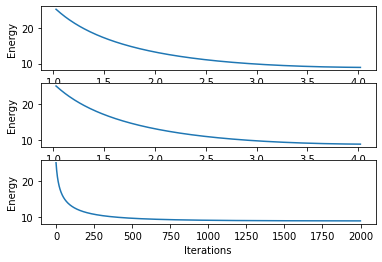

In [14]:
psi_trial = lambda zeeta,peeta, x: np.square(x*peeta)*np.exp(-(zeeta*x))
zeeta_ini = 1.0
peeta_ini = 1.0
step = 0.001
num_iterations = 2000
tolerance = 1.0e-6
method=Variational_method(psi_trial,zeeta_ini,peeta_ini,step,num_iterations,tolerance)
Energy_list, zeeta_list, peeta_list, iteration_list = method.gradient_descent()
print(f"The least energy is:{Energy_list[-1]}")

                         # Trial Wavefunction 2

Iteration    0: Expected_Energy 188.75332378506678 , zeeta and peeta: 3.006410519378046, 1.0064105193780464
Iteration  200: Expected_Energy 185.67633283436302 , zeeta and peeta: 3.777734478591282, 1.777734478591282
Iteration  400: Expected_Energy 184.3922830048077 , zeeta and peeta: 4.282309738802153, 2.282309738802154
Iteration  600: Expected_Energy 183.59774041319054 , zeeta and peeta: 4.680139896657905, 2.6801398966579004
Iteration  800: Expected_Energy 183.02738112010607 , zeeta and peeta: 5.017483523338158, 3.01748352333815
Iteration 1000: Expected_Energy 182.58414558520244 , zeeta and peeta: 5.314982686560442, 3.3149826865604246
Iteration 1200: Expected_Energy 182.22224191277175 , zeeta and peeta: 5.583863397633567, 3.5838633976335514
Iteration 1400: Expected_Energy 181.9166085663207 , zeeta and peeta: 5.830991415852832, 3.8309914158528233
Iteration 1600: Expected_Energy 181.65210920428873 , zeeta and peeta: 6.0609093156990514, 4.060909315699042
Iteration 1800: Expected_Energy 18

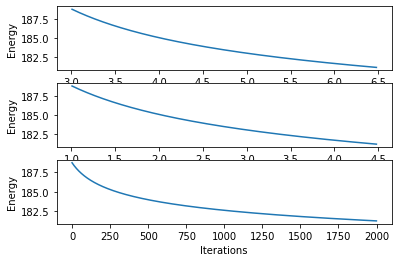

In [15]:
psi_trial = lambda zeeta,peeta, x: (x+zeeta)**2*np.exp(zeeta*x**0.5/peeta)
zeeta_ini = 3.0
peeta_ini = 1.0
step = 0.001
num_iterations = 2000
tolerance = 1.0e-6
method=Variational_method(psi_trial,zeeta_ini,peeta_ini,step,num_iterations,tolerance)
Energy_list, zeeta_list, peeta_list, iteration_list = method.gradient_descent()
print(f"The least energy is:{Energy_list[-1]}")